# Health Care project 

# 1st milestone

### Cleaning data 

 ###  Importing libraries 

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

###  Loading dataset

In [7]:
df = pd.read_csv("Heart_Dis_Data.csv")


### see a data  sample to understand how the data looking like 

In [4]:
df.sample()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
258870,No,35.44,Yes,No,No,0,0,No,Male,55-59,Black,Yes,No,Good,6,No,Yes,No


In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
df.shape

(319794, 18)

###  understand the data info 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319794 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319794 non-null  object 
 1   BMI               319794 non-null  float64
 2   Smoking           319794 non-null  object 
 3   AlcoholDrinking   319794 non-null  object 
 4   Stroke            319794 non-null  object 
 5   PhysicalHealth    319794 non-null  int64  
 6   MentalHealth      319794 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319794 non-null  object 
 9   AgeCategory       319794 non-null  object 
 10  Race              319794 non-null  object 
 11  Diabetic          319794 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319794 non-null  object 
 14  SleepTime         319794 non-null  int64  
 15  Asthma            319794 non-null  object 
 16  KidneyDisease     31

###  checking for null values 

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### checking for duplicates 

In [9]:
df.duplicated().sum()

np.int64(18078)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

###  Outlier handling 

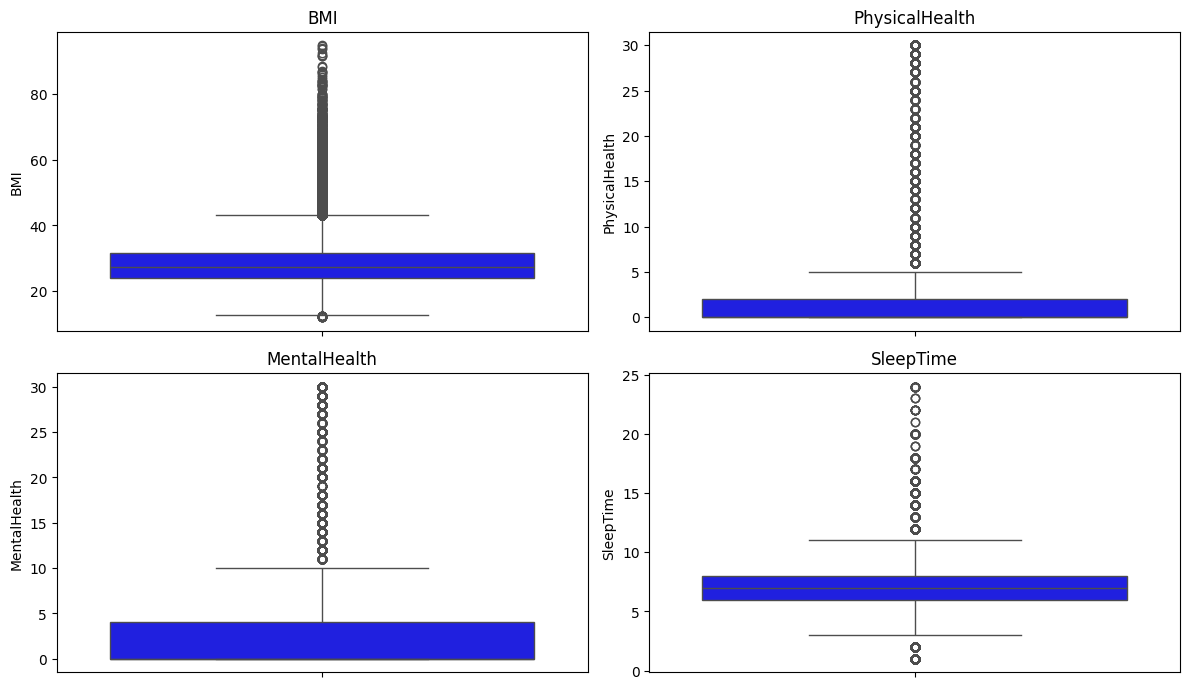

In [12]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Blue")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'SleepTime')

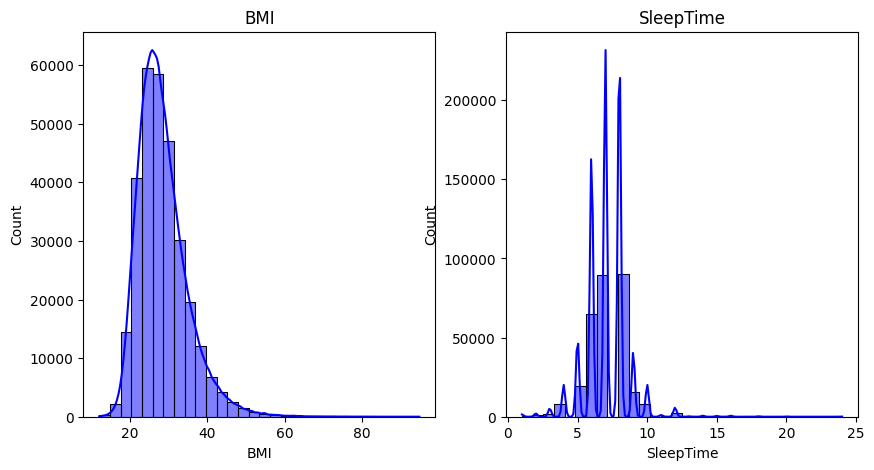

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
sns.histplot(df["BMI"], bins =30, ax=axes[0] , kde=True, color = "Blue")
axes[0].set_title("BMI")
sns.histplot(df["SleepTime"], ax=axes[1], bins =30, kde=True, color = "blue")
axes[1].set_title("SleepTime")

In [14]:
# fixing outliers for bmi
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 60)]

In [15]:
# sleep time outlier handling
Q1 = df["SleepTime"].quantile(0.25)
Q3 = df["SleepTime"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["SleepTime"] >= lower_bound) & (df["SleepTime"] <= upper_bound)]

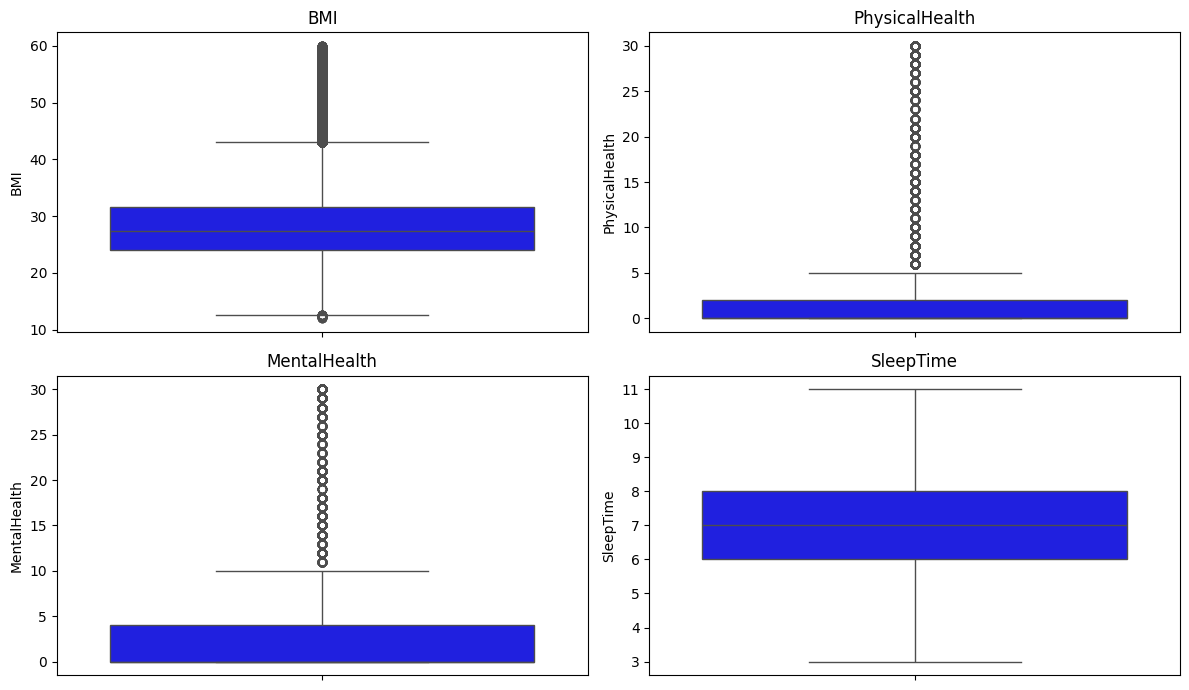

In [16]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Blue")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [17]:
# droping mental and pythical health coloumns 
df.drop(columns={"PhysicalHealth","MentalHealth"}, inplace=True)

In [3]:
df_preproccesed = df.copy()
df_preproccesed["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [19]:

age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, 
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}

df_preproccesed['AgeCategory'] = df_preproccesed['AgeCategory'].map(age_mapping)
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [20]:
df_preproccesed["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [21]:
# Define an ordered mapping
GenHealth_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

# Apply mapping
df_preproccesed['GenHealth'] = df_preproccesed['GenHealth'].map(GenHealth_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [22]:
df_preproccesed = pd.get_dummies(df_preproccesed, columns=['Race'], drop_first=True) # Set `drop_first=True' to remove one column for multicollinearity
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### EDA

In [23]:
print(df_preproccesed['Sex'].unique())


['Female' 'Male']


In [24]:
print(df_preproccesed['HeartDisease'].unique())

['No' 'Yes']


###  Setting color pallete to use it in visuals 

In [25]:
colors = ['#add8e6',  
               '#87ceeb',  
               '#4682b4',  
               '#4169e1',  
               '#000080']  

In [26]:
numerical_cols = (df_preproccesed.select_dtypes(include=['number'])).columns
df_preproccesed_std = (df_preproccesed[numerical_cols] - df_preproccesed[numerical_cols].min()) / (df_preproccesed[numerical_cols].max() - df_preproccesed[numerical_cols].min())
df_preproccesed_std.head()

,BMI,AgeCategory,GenHealth,SleepTime
0,0.095516,0.583333,0.75,0.250
1,0.173514,1.000000,0.75,0.500
2,0.303650,0.750000,0.25,0.625
3,0.254223,0.916667,0.50,0.375
4,0.243796,0.333333,0.75,0.625


Sex Distribuation
Female -> 0  ,  Male -> 1


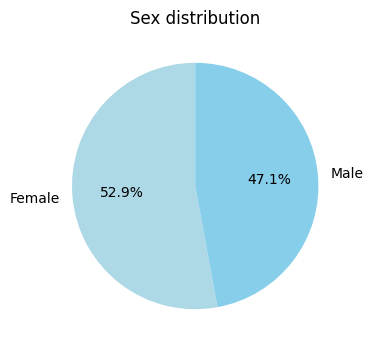

In [27]:
print("Sex Distribuation")
print("Female -> 0  ,  Male -> 1")
Sex_distribution = df_preproccesed["Sex"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Sex_distribution.values , labels = Sex_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sex distribution")
plt.show()

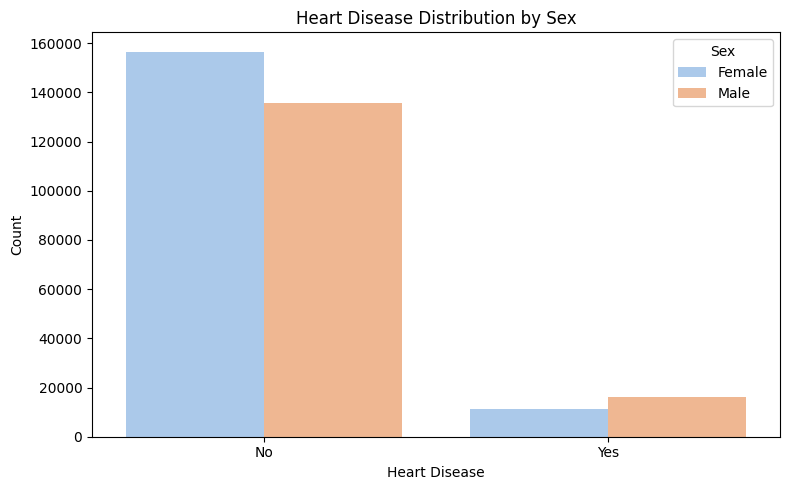

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data directly using current labels
Sex_counts = df_preproccesed.groupby(["HeartDisease", "Sex"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Sex", data=Sex_counts, palette="pastel")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Sex")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


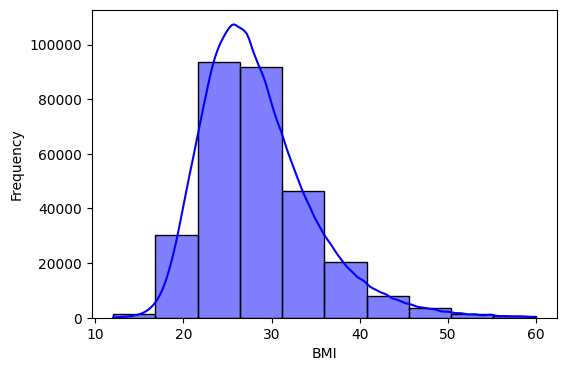

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(df_preproccesed["BMI"], bins = 10, kde=True ,  color = "Blue")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

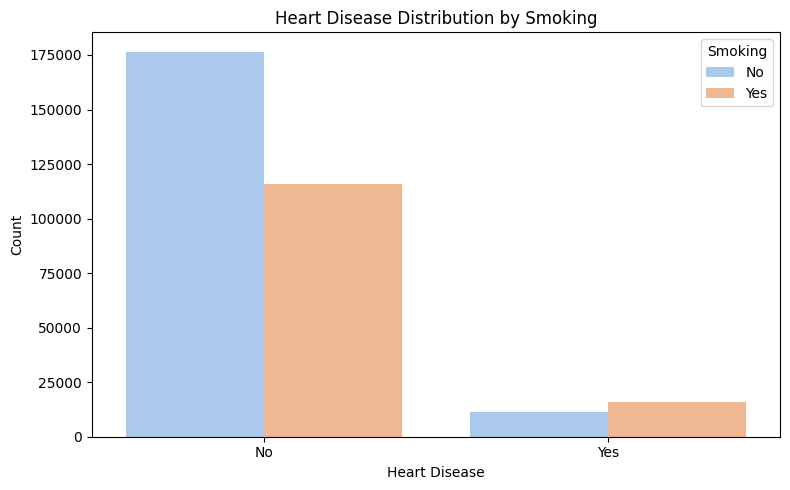

In [5]:
# Group without unnecessary mapping
smoking_counts = df_preproccesed.groupby(["HeartDisease", "Smoking"]).size().reset_index(name="Count")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Smoking", data=smoking_counts, palette="pastel")

plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Smoking")
plt.legend(title="Smoking")
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4364\1752817878.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)


  HeartDisease AlcoholDrinking   Count
0           No              No  250081
1           No             Yes   20186
2          Yes              No   25345
3          Yes             Yes    1093


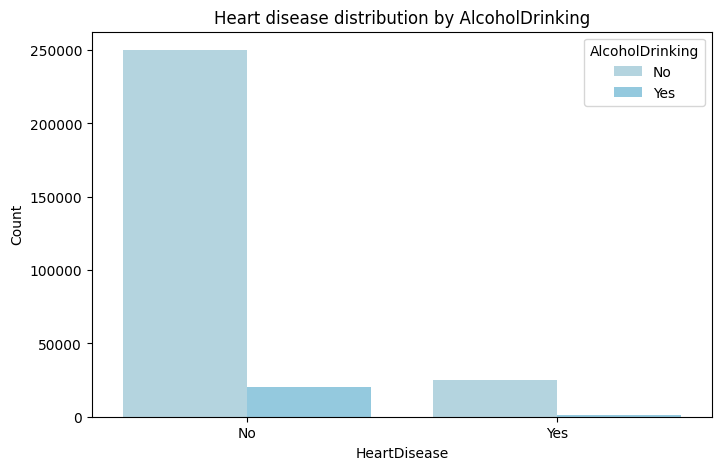

In [31]:
AlcoholDrinking_counts = df.groupby(["HeartDisease", "AlcoholDrinking"]).size().reset_index(name="Count")
print(AlcoholDrinking_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by AlcoholDrinking")
plt.legend(title="AlcoholDrinking")
plt.show()

In [32]:
df = df[(df["Diabetic"] == "Yes") | (df["Diabetic"] == "No")]

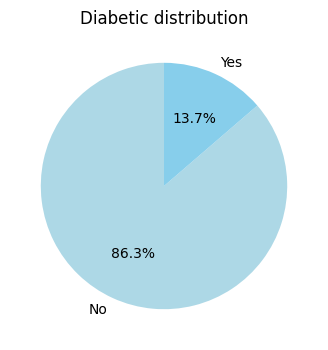

In [33]:
Diabetic_distribution = df["Diabetic"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Diabetic_distribution.values , labels = Diabetic_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Diabetic distribution")
plt.show()

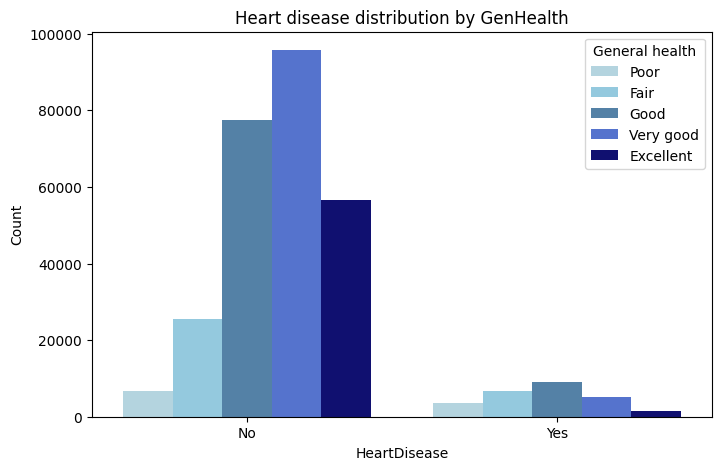

In [34]:
GenHealth_counts = df.groupby(["HeartDisease", "GenHealth"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

GenHealth_colors = {
    "Poor": colors[0],  
    "Fair": colors[1],  
    "Good": colors[2],  
    "Very good": colors[3],
    "Excellent": colors[4]
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(GenHealth_colors.keys())

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="GenHealth", 
            data=GenHealth_counts, palette=GenHealth_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by GenHealth")
plt.legend(title="General health")

# Show plot
plt.show()

  HeartDisease Diabetic   Count
0           No       No  231222
1           No      Yes   30738
2          Yes       No   16975
3          Yes      Yes    8590


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4364\694972907.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)


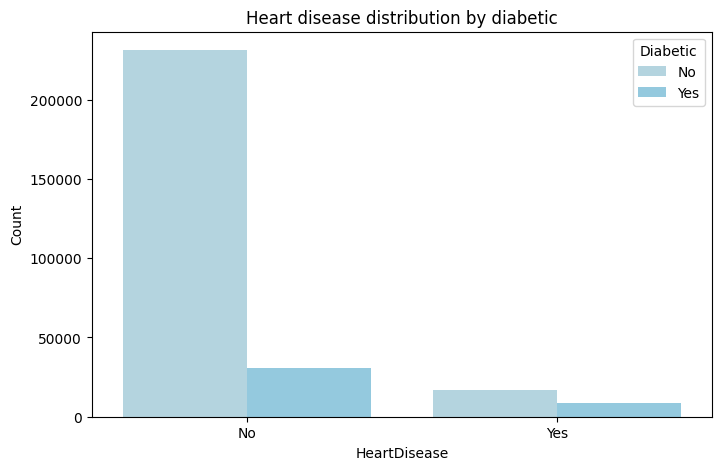

In [35]:
Diabetic_counts = pd.DataFrame(df.groupby(["HeartDisease", "Diabetic"]).size().reset_index(name="Count"))
print(Diabetic_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)

plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by diabetic")
plt.legend(title="Diabetic")

plt.show()

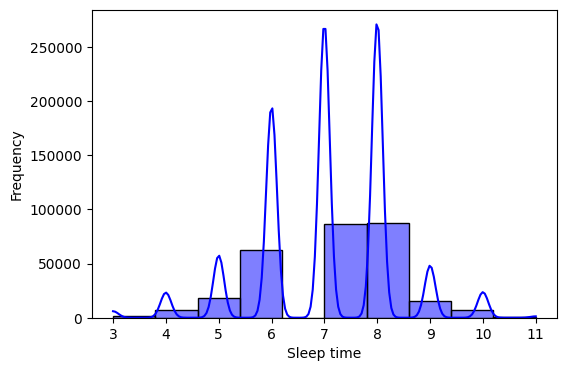

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SleepTime"], bins = 10, kde=True ,  color = "blue")
# Labels and title
plt.xlabel("Sleep time")
plt.ylabel("Frequency")
# Show plot
plt.show()

In [37]:
# Define an ordered mapping
age_mapping = {
    '18-24': 'Young-Adult', '25-29': 'Young-Adult', '30-34': 'Young-Adult', '35-39': 'Young-Adult',
    '40-44': 'Middle-Adult', '45-49': 'Middle-Adult', '50-54': 'Middle-Adult',
    '55-59': 'Middle-Adult', '60-64': 'Middle-Adult', '65-69': 'Young-Old',
    '70-74': 'Young-Old', '75-79': 'Middle-Old', '80 or older': 'Middle-Old'
}

# Apply mapping
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,Middle-Adult,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,Middle-Old,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,Young-Old,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,Middle-Old,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,Middle-Adult,White,No,Yes,Very good,8,No,No,No


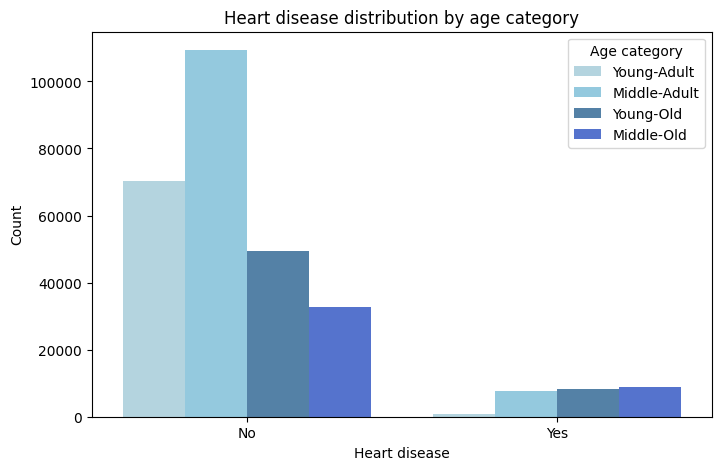

In [38]:
AgeCategory_counts = df.groupby(["HeartDisease", "AgeCategory"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

age_colors = {
    "Young-Adult": colors[0],  
    "Middle-Adult": colors[1],  
    "Young-Old": colors[2],  
    "Middle-Old": colors[3]  
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = ["Young-Adult", "Middle-Adult", "Young-Old", "Middle-Old"]

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="AgeCategory", 
            data=AgeCategory_counts, palette=age_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by age category")
plt.legend(title="Age category")

# Show plot
plt.show()

In [39]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999
colors = sns.color_palette("Blues")  

In [40]:
print(df_preproccesed.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')


# 2nd Milestone

## Data Analysis

### 1. Correlation Analysis

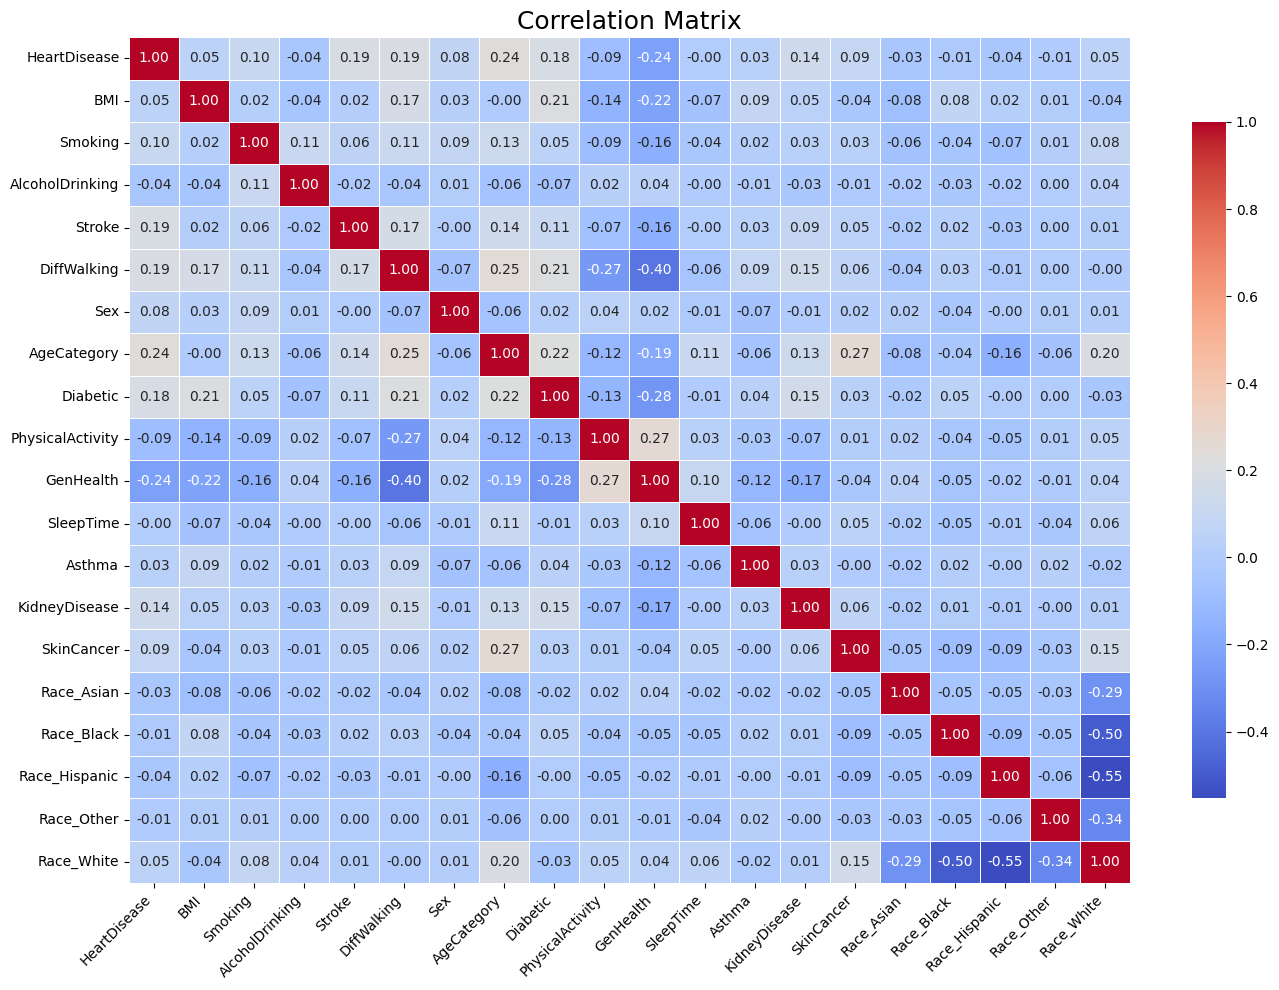

In [41]:
# Convert any non-numeric columns to numeric using .map()
for col in df_preproccesed.select_dtypes(include=['object']).columns:
    if df_preproccesed[col].dtype == 'object':
        # Example: If the column contains 'Yes'/'No', map to 1/0
        if df_preproccesed[col].str.contains('Yes|No').any():
            df_preproccesed[col] = df_preproccesed[col].map({'Yes': 1, 'No': 0})
        else:
            # For other categorical values, you might want to use pd.get_dummies or label encoding
            df_preproccesed[col] = pd.Categorical(df_preproccesed[col]).codes

# Now you can calculate the correlation matrix
corr_matrix = df_preproccesed.corr()

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 2. Hypothesis Testing Example

In [42]:
from scipy.stats import ttest_ind, chi2_contingency 
import pandas as pd

group_1 = df_preproccesed[df_preproccesed['HeartDisease'] == 1]['SleepTime']
group_2 = df_preproccesed[df_preproccesed['HeartDisease'] == 0]['SleepTime']

print(f"Group 1 (Heart Disease == 1) count: {group_1.shape[0]}")
print(f"Group 2 (Heart Disease == 0) count: {group_2.shape[0]}")

if group_1.shape[0] > 0 and group_2.shape[0] > 0:
    t_stat, p_val = ttest_ind(group_1, group_2)
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
else:
    print("Insufficient data for one or both groups.")

contingency_table = pd.crosstab(df_preproccesed['Smoking'], df_preproccesed['HeartDisease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square value:", chi2)
print("P-value:", p)


Group 1 (Heart Disease == 1) count: 26438
Group 2 (Heart Disease == 0) count: 270267
T-statistic: -0.25485460423847994
P-value: 0.7988355758922752
Chi-Square value: 3193.539171840167
P-value: 0.0


In [43]:
from scipy.stats import ttest_ind  # Import the t-test function

# Group 1: Heart Disease == 1
group_1 = df_preproccesed[df_preproccesed['HeartDisease'] == 1]['SleepTime']
# Group 2: Heart Disease == 0
group_2 = df_preproccesed[df_preproccesed['HeartDisease'] == 0]['SleepTime']

print(f"Group 1 (Heart Disease == 1) count: {group_1.shape[0]}")
print(f"Group 2 (Heart Disease == 0) count: {group_2.shape[0]}")

# Proceed with t-test if both groups have enough data
if group_1.shape[0] > 0 and group_2.shape[0] > 0:
    t_stat, p_val = ttest_ind(group_1, group_2)
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
else:
    print("Insufficient data for one or both groups.")




Group 1 (Heart Disease == 1) count: 26438
Group 2 (Heart Disease == 0) count: 270267
T-statistic: -0.25485460423847994
P-value: 0.7988355758922752


In [44]:
from scipy.stats import chi2_contingency 

# 2. Chi-Square test on Smoking
contingency_table = pd.crosstab(df_preproccesed['Smoking'],df_preproccesed['HeartDisease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square value:", chi2)
print("P-value:", p)


Chi-Square value: 3193.539171840167
P-value: 0.0


p-value is less than 0.05 so There is a strong statistical association between smoking and the incidence of heart disease.

"The most influential factors on heart disease risk were individuals' general health status, age category, history of stroke, and gender. Poor general health showed the strongest positive association with heart disease incidence."



# 3rd Milestone

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Load dataset
df = pd.read_csv("Heart_Dis_Data.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("HeartDisease_Yes", axis=1)
y = df_encoded["HeartDisease_Yes"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic regression 

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
from sklearn.metrics import roc_auc_score

In [71]:
df_encoded.sample()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
257351,36.18,0,0,8,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False


In [11]:

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report


# Check class distribution
print("Original class distribution:")
print(df_encoded['HeartDisease_Yes'].value_counts()) 

#  Separate Features and Target
X = df_encoded.drop('HeartDisease_Yes', axis=1) 
y = df_encoded['HeartDisease_Yes']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE oversampling (Train data only):")
print(Counter(y_train_res))



Original class distribution:
HeartDisease_Yes
False    292422
True      27372
Name: count, dtype: int64


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python3


After SMOTE oversampling (Train data only):
Counter({False: 233937, True: 233937})


In [49]:
# Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

# Predict and Evaluate
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show individual scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.87      0.91     58485
        True       0.27      0.51      0.35      5474

    accuracy                           0.84     63959
   macro avg       0.61      0.69      0.63     63959
weighted avg       0.89      0.84      0.86     63959

Accuracy: 0.84
Precision: 0.27
Recall: 0.51
F1 Score: 0.35


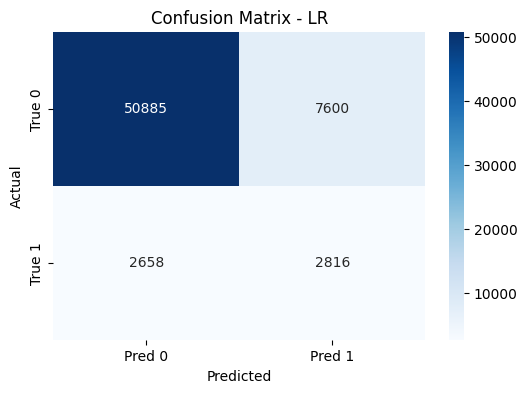

In [50]:
# visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LR')
plt.show()


In [51]:

y_probs_log = model.predict_proba(X_test)[:,1]

# Apply threshold
y_pred_log_new = (y_probs_log > 0.3).astype(int)

# Report
print("Classification Report (Logistic Regression) with Threshold 0.3:")
print(classification_report(y_test, y_pred_log_new))


Classification Report (Logistic Regression) with Threshold 0.3:
              precision    recall  f1-score   support

       False       0.96      0.75      0.84     58485
        True       0.21      0.71      0.32      5474

    accuracy                           0.75     63959
   macro avg       0.59      0.73      0.58     63959
weighted avg       0.90      0.75      0.80     63959



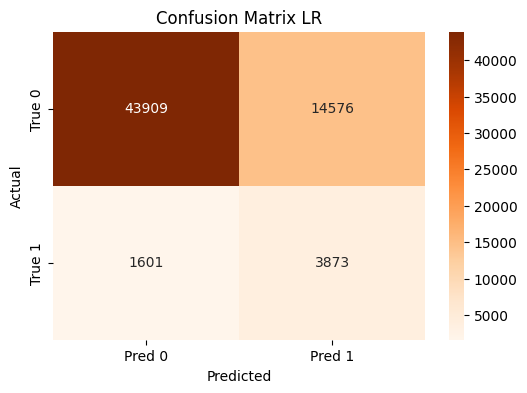

In [52]:
# Visualize confusion matrix after applying threshold adjustment
cm_sm = confusion_matrix(y_test, y_pred_log_new)

plt.figure(figsize=(6,4))
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model_rf.fit(X_train_res, y_train_res)
trained_columns = X_train_res.columns.tolist()

# Predict and Evaluate
y_pred_rf = model_rf.predict(X_test)



print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Show individual scores
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")



Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.96      0.83      0.89     58485
        True       0.26      0.63      0.37      5474

    accuracy                           0.81     63959
   macro avg       0.61      0.73      0.63     63959
weighted avg       0.90      0.81      0.85     63959

Accuracy: 0.81
Precision: 0.26
Recall: 0.63
F1 Score: 0.37


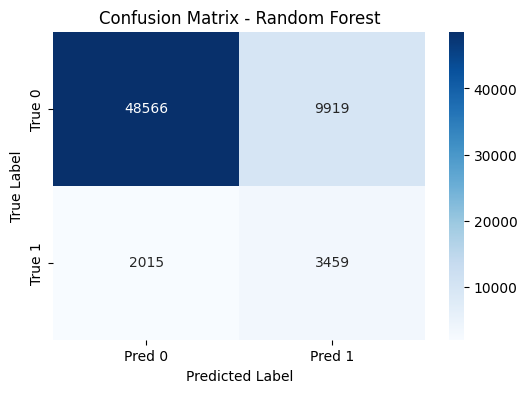

In [54]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
# probabilities
y_probs_rf = model_rf.predict_proba(X_test)[:,1]

# Apply threshold
y_pred_rf_new = (y_probs_rf > 0.4).astype(int)

# Report
print("Classification Report (Random Forest) with Threshold 0.4:")
print(classification_report(y_test, y_pred_rf_new))


Classification Report (Random Forest) with Threshold 0.4:
              precision    recall  f1-score   support

       False       0.97      0.73      0.83     58485
        True       0.21      0.77      0.33      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.73      0.79     63959



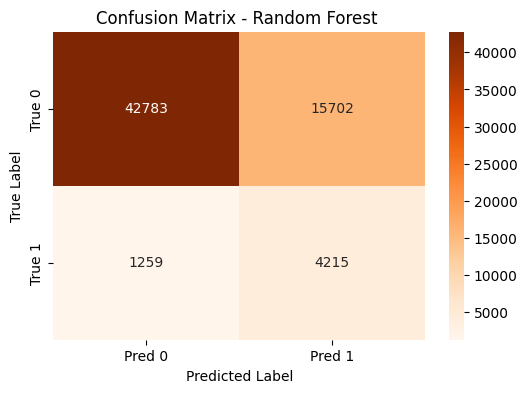

In [56]:
cm_rf_thresh = confusion_matrix(y_test, y_pred_rf_new)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_thresh, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest ')
plt.show()


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_res, y_train_res)
y_pred_knn = model_knn.predict(X_test)

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")




Classification Report (KNN):
              precision    recall  f1-score   support

       False       0.94      0.86      0.90     58485
        True       0.22      0.41      0.28      5474

    accuracy                           0.82     63959
   macro avg       0.58      0.64      0.59     63959
weighted avg       0.88      0.82      0.85     63959

Accuracy: 0.82
Precision: 0.22
Recall: 0.41
F1 Score: 0.28


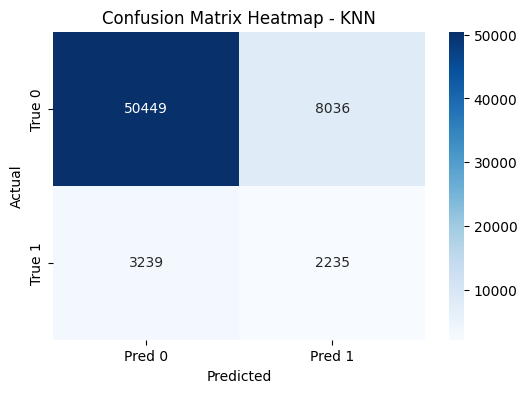

In [58]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - KNN')
plt.show()


In [59]:
y_probs_knn = model_knn.predict_proba(X_test)[:,1]
y_pred_knn_new = (y_probs_knn > 0.3).astype(int)

print("Classification Report (KNN) with Threshold 0.3:")
print(classification_report(y_test, y_pred_knn_new))


Classification Report (KNN) with Threshold 0.3:
              precision    recall  f1-score   support

       False       0.95      0.80      0.87     58485
        True       0.20      0.53      0.29      5474

    accuracy                           0.77     63959
   macro avg       0.57      0.66      0.58     63959
weighted avg       0.88      0.77      0.82     63959



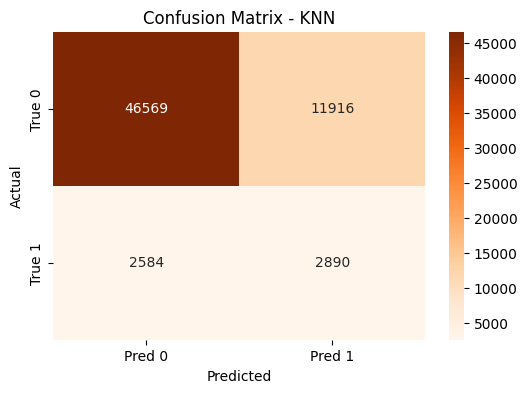

In [60]:
cm_knn_thresh = confusion_matrix(y_test, y_pred_knn_new)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_thresh, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


## XGBoost

In [61]:
from xgboost import XGBClassifier

# XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train_res, y_train_res)
y_pred_xgb = model_xgb.predict(X_test)

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:35:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       0.95      0.88      0.91     58485
        True       0.27      0.48      0.34      5474

    accuracy                           0.85     63959
   macro avg       0.61      0.68      0.63     63959
weighted avg       0.89      0.85      0.86     63959

Accuracy: 0.85
Precision: 0.27
Recall: 0.48
F1 Score: 0.34


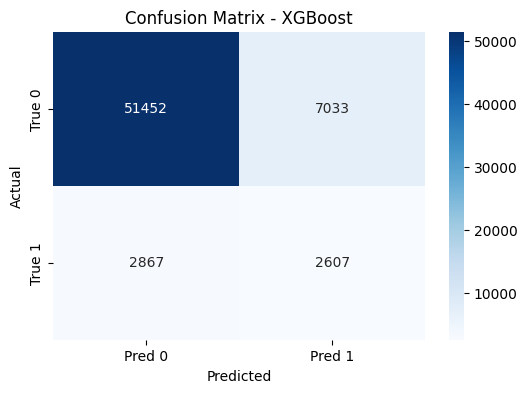

In [62]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [63]:
y_probs_xgb = model_xgb.predict_proba(X_test)[:,1]

y_pred_xgb_new = (y_probs_xgb > 0.3).astype(int)

# Report
print("Classification Report (XGBoost) with Threshold 0.3:")
print(classification_report(y_test, y_pred_xgb_new))


Classification Report (XGBoost) with Threshold 0.3:
              precision    recall  f1-score   support

       False       0.96      0.78      0.86     58485
        True       0.22      0.66      0.33      5474

    accuracy                           0.77     63959
   macro avg       0.59      0.72      0.60     63959
weighted avg       0.90      0.77      0.82     63959



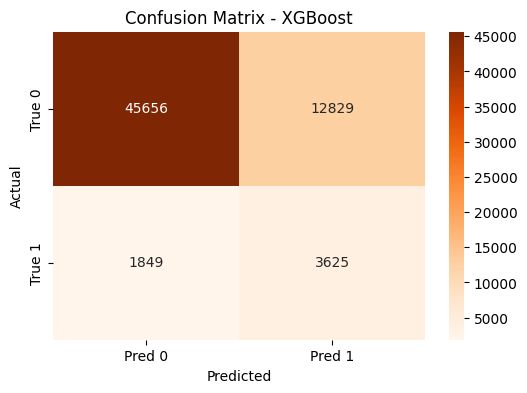

In [64]:
cm_xgb_thresh = confusion_matrix(y_test, y_pred_xgb_new)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_thresh, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


## Model Comparison

After applying SMOTE to address class imbalance and tuning custom probability thresholds for each model, we evaluated the performance of four classifiers: Logistic Regression, Random Forest, K-Nearest Neighbors(KNN), and XGBoost. The table below summarizes their performance:

In [66]:
models = {
    'Logistic Regression': (y_test, y_pred_log_new, y_probs_log),
    'Random Forest':       (y_test, y_pred_rf_new, y_probs_rf),
    'KNN':                 (y_test, y_pred_knn_new, y_probs_knn),
    'XGBoost':             (y_test, y_pred_xgb_new, y_probs_xgb)
}

results = []

for name, (y_true, y_pred, y_prob) in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
    })

results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
results_df = results_df.round(4) 

results_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.7471,0.2099,0.7075,0.3238
Random Forest,0.7348,0.2116,0.7700,0.3320
KNN,0.7733,0.1952,0.5280,0.2850
XGBoost,0.7705,0.2203,0.6622,0.3306


##  Logistic Regression – Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(max_iter=1000, random_state=42)

log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(log_model, log_params, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train_res, y_train_res)

print("Best Parameters for Logistic Regression:")
print(grid_log.best_params_)
print("Best F1 Score:")
print(grid_log.best_score_)


## Random Forest – Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_rf.fit(X_train_res, y_train_res)

print("Best Parameters for Random Forest:")
print(random_rf.best_params_)
print("Best F1 Score:")
print(random_rf.best_score_)


##  K-Nearest Neighbors (KNN) – Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

knn_model = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=knn_params,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_knn.fit(X_train_res, y_train_res)

print("Best Parameters for KNN:")
print(random_knn.best_params_)
print("Best F1 Score:")
print(random_knn.best_score_)


## XGBoost – Grid Search

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

random_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_xgb.fit(X_train_res, y_train_res)

print("Best Parameters for XGBoost:")
print(random_xgb.best_params_)
print("Best F1 Score:")
print(random_xgb.best_score_)


## Logistic Regression - Evaluation with Best Parameters

In [ ]:
log_best_model = grid_log.best_estimator_

log_best_model.fit(X_train_res, y_train_res)
y_pred_log = log_best_model.predict(X_test)

print("\nClassification Report for Logistic Regression with Best Params:")
print(classification_report(y_test, y_pred_log))

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Accuracy: {accuracy_log:.2f}")
print(f"Precision: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")


## Random Forest - Evaluation with Best Parameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

rf_best_model = random_rf.best_estimator_

rf_best_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_best_model.predict(X_test)

print("\nClassification Report for Random Forest with Best Params:")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")


##  K-Nearest Neighbors (KNN) - Evaluation with Best Parameters

In [ ]:
knn_best_model = grid_knn.best_estimator_

knn_best_model.fit(X_train_res, y_train_res)
y_pred_knn = knn_best_model.predict(X_test)

print("\nClassification Report for KNN with Best Params:")
print(classification_report(y_test, y_pred_knn))

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")


## XGBoost - Evaluation with Best Parameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

xgb_best_model = random_xgb.best_estimator_

xgb_best_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_best_model.predict(X_test)

print("\nClassification Report for XGBoost with Best Params:")
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")



# 4th Milestone


In [13]:
import joblib

In [14]:
joblib.dump(model_rf,"model_rf.pkl")

['model_rf.pkl']